# Exploratory Data Analysis

In [1]:
# Utility
import os

# Data processing
import numpy as np
import pandas as pd

# Statistics
from scipy.stats import skew

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Other scripts
from eda_utility import count_columns_by_dtype, summarize_numeric_columns, plot_histograms_and_boxplots

In [2]:
# Set the notebook display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Raw Data

In [3]:
# # Get the parent directory of the current working directory
# parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# # Define the file path for the CSV file
# file_path = os.path.join(parent_dir, "raw_data", "synthetic_dataset.csv")

# Get the parent directory of the current working directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Define the file path for the CSV file
file_path = os.path.join(parent_dir, "raw_data/titanic_kaggle_data", "train.csv")

df = pd.read_csv(file_path)

# Drop columns containing all NaN, Zero, None, or Empty string
df = df.loc[:, ~(df.isna().all() | df.isnull().all() | (df == 0).all() | (df == '').all())]

print('Dataframe sample:')
df.head()

Dataframe sample:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Type Analysis & Conversion

In [4]:
count_columns_by_dtype(df)

,Data Type,Count
0,int64,5
1,float64,2
2,object,5


Different pandas column types

Numeric types:
int64: Signed 64-bit integer
float64: Floating-point number

Boolean type:
bool: True/False values

Date/time types:
datetime64: Date and time values
timedelta64: Differences between two datetime values

Categorical type:
categorical: Finite list of text values

Text types:
object: Any Python object

In [7]:
# Get the numeric columns from the DataFrame


numeric_df = df.select_dtypes(include=['int64', 'float64']).columns

# Create a list to store the results for each numeric column
results_list = []

# Iterate over each numeric column in the DataFrame
for col in numeric_df:
    col_dtype = str(df[col].dtype)

    # Determine the types of values in the column
    non_nan_count = df[col].count()
    nan_count = df[col].isna().sum()
    zero_count = len(df[df[col] == 0])
    
    # If there are non-NaN values in the column, calculate the statistics
    if non_nan_count > 0:
        non_nan_values = df[col].dropna()
        mean = non_nan_values.mean()
        std = non_nan_values.std()
        minimum = non_nan_values.min()
        percentile25 = np.percentile(non_nan_values, 25)
        median = np.percentile(non_nan_values, 50)
        percentile75 = np.percentile(non_nan_values, 75)
        maximum = non_nan_values.max()
        num_upper_outliers = len(df[df[col] > percentile75 + 1.5*(percentile75-percentile25)])
        num_lower_outliers = len(df[df[col] < percentile25 - 1.5*(percentile75-percentile25)])
        skewness = skew(non_nan_values)
    
    # Add the results to the results list for this column
    results_list.append([col, col_dtype, non_nan_count, nan_count, zero_count, mean, std, minimum, percentile25, median, percentile75, maximum, num_lower_outliers, num_upper_outliers, skewness])

# Create the result DataFrame from the list of results
numeric_summary_df = pd.DataFrame(results_list, columns=["Column", "Column Type", "Non-NaN Count", "NaN Count", "Zero Count", "Mean", "Std", "Min", "25%", "Median", "75%", "Max", "Num Lower Outliers", "Num Upper Outliers", "Skew"])

numeric_summary_df


,Column,Column Type,Non-NaN Count,NaN Count,Zero Count,Mean,Std,Min,25%,Median,75%,Max,Num Lower Outliers,Num Upper Outliers,Skew
0,PassengerId,int64,891,0,0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,0,0,0.000000
1,Survived,int64,891,0,549,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,0,0,0.477717
2,Pclass,int64,891,0,0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,0,0,-0.629486
3,Age,float64,714,177,0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,0,11,0.388290
4,SibSp,int64,891,0,608,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,0,46,3.689128
5,Parch,int64,891,0,678,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,0,213,2.744487
6,Fare,float64,891,0,15,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,0,116,4.779253


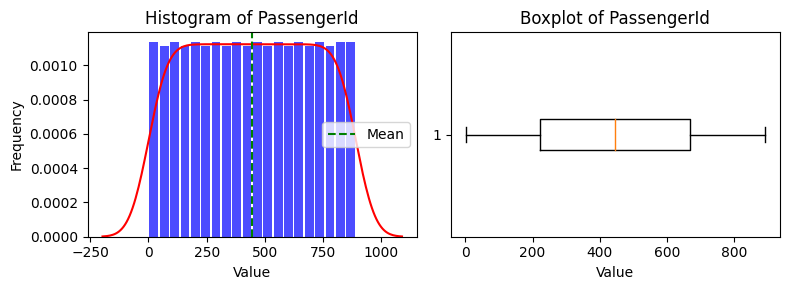

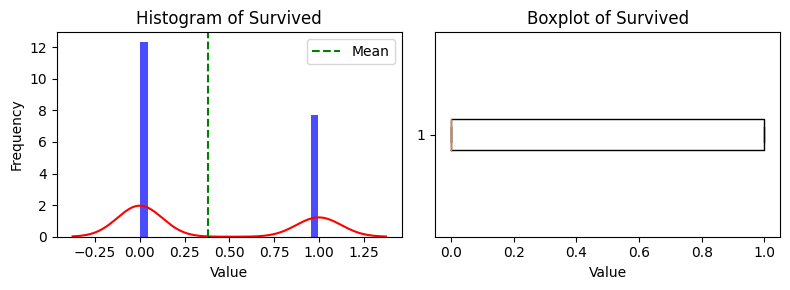

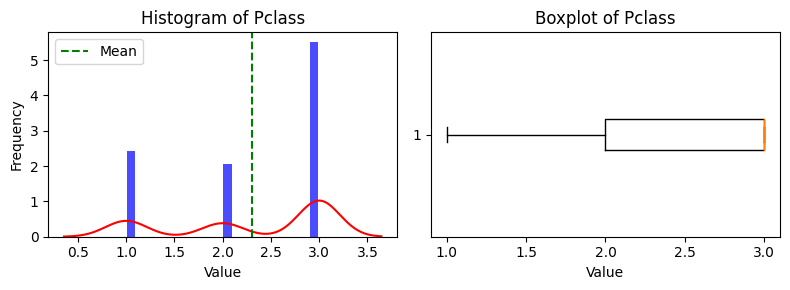

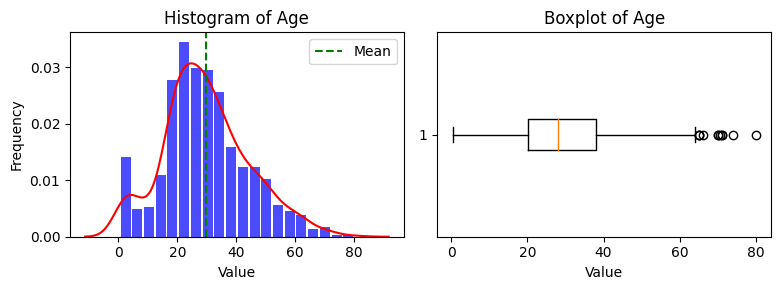

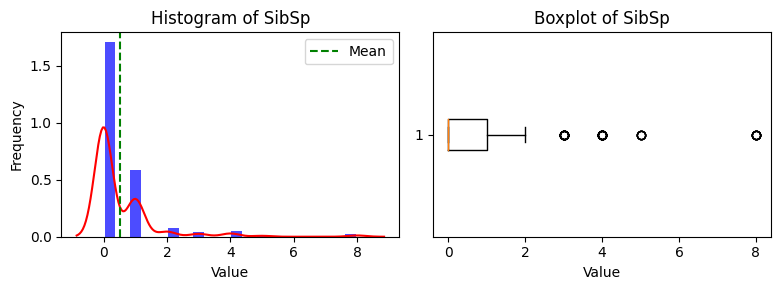

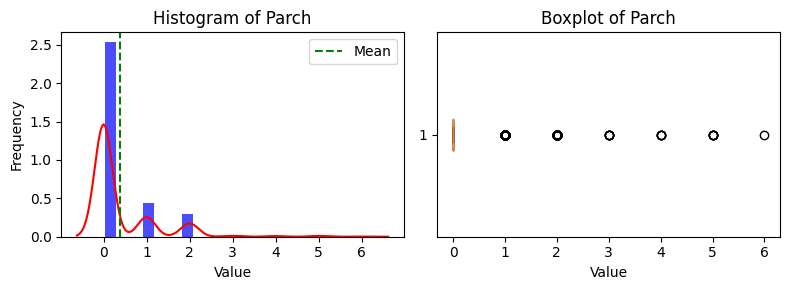

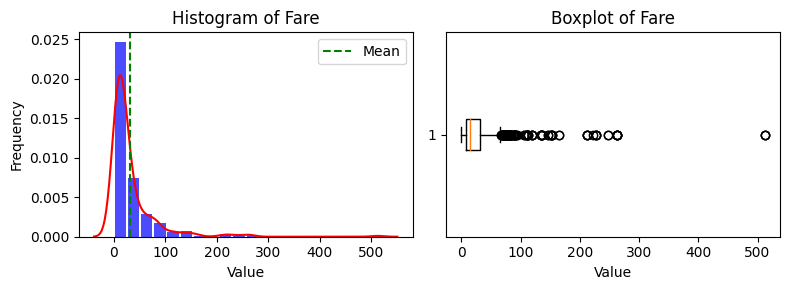

In [8]:


plot_histograms_and_boxplots(df)


In [10]:
# Select the columns of interest
cols_of_interest = df.select_dtypes(include=['O', 'bool', 'category']).columns

# Create a list to store the results for each column
results_list = []

# Iterate over each column of interest
for col in cols_of_interest:
    # Determine the counts of non-None, None, and empty values in the column
    non_none_count = df[col].count()
    none_count = df[col].isna().sum()
    empty_count = len(df[df[col] == ""])
    
    # Calculate the number of unique values and the mode of the column
    num_unique = len(df[col].unique())
    mode_value = df[col].mode().iloc[0]
    mode_count = df[col].value_counts()[mode_value]
    
    # Add the results to the results list for this column
    results_list.append([col, str(df[col].dtype), non_none_count, none_count, empty_count, num_unique, mode_value, mode_count])

# Create the result DataFrame from the list of results
categorical_summary_df = pd.DataFrame(results_list, columns=["Column", "Column Type", "Non-None Count", "None Count", "Empty Count", "Num Unique", "Mode", "Mode Occurrences"])

categorical_summary_df


,Column,Column Type,Non-None Count,None Count,Empty Count,Num Unique,Mode,Mode Occurrences
0,Name,object,891,0,0,891,"Abbing, Mr. Anthony",1
1,Sex,object,891,0,0,2,male,577
2,Ticket,object,891,0,0,681,1601,7
3,Cabin,object,204,687,0,148,B96 B98,4
4,Embarked,object,889,2,0,4,S,644


In [11]:
# If datetime or timedelta

# Select the columns that are of type datetime64 or timedelta64
date_cols = dtypes_df[dtypes_df["Original Data Type"].isin(["datetime64[ns]", "timedelta64[ns]"])]["Original Column Name"]

# Iterate over each date column and display information about it
for col in date_cols:
    if df[col].dtype == "datetime64[ns]":
        print(f"Column: {col} (datetime)")
        print(f"Earliest date: {df[col].min()}")
        print(f"Latest date: {df[col].max()}")
        print(f"Number of unique dates: {df[col].nunique()}")
    else:
        print(f"Column: {col} (timedelta)")
        print(f"Shortest time: {df[col].min()}")
        print(f"Longest time: {df[col].max()}")
        print(f"Number of unique times: {df[col].nunique()}")
    print("\n")

NameError: name 'dtypes_df' is not defined

In [ ]:
# A decision needs to be made on how to fill the nan, empty string, none, and zero values

## Formatting Options

In [ ]:
# Create a new column with spaces instead of underscores and initial case
dtypes_df["New Column Name"] = dtypes_df["Original Column Name"].str.replace("_", " ").str.title()